In [6]:
function RK_sim_gif(bodies, n)
    p = []
    orbit = []
    
for i in 1:length(bodies)
    
    r = bodies[i].r
    v = bodies[i].v
    t = 0.0 
    
    orbit = [r]
     
    for j in 1:length(bodies)
        if i != j
            while t < 365.25*24*3600*n
        
                r, v = rk4_step(r, v, bodies[j].m, G, dt)
                t += dt
                push!(orbit, r)
            end
                orbit = hcat(orbit...)
        end
            
    end
        p = push!(p, orbit)
end
    return p
end

RK_sim_gif (generic function with 1 method)

In [287]:
RK_sim_gif([sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune], .001)

9-element Vector{Any}:
 [0.0 0.0 … NaN NaN]
 [4.6e10 0.0 … 4.596707686365682e10 1.910172179874459e9]
 [1.0748e11 0.0 … 1.074739682813779e11 1.1424026291871889e9]
 [1.47095e11 0.0 … 1.4709177965021033e11 9.813888380920353e8]
 [2.0665e11 0.0 … 2.066483683425771e11 8.585977402348758e8]
 [7.40595e11 0.0 … 7.405948729604442e11 4.4452797458231103e8]
 [1.357554e12 0.0 … 1.3575539621917737e12 3.285359969500628e8]
 [2.732696e12 0.0 … 2.732695990669221e12 2.3101199973707017e8]
 [4.47105e12 0.0 … 4.471049996514369e12 1.7722799995394433e8]

[ Info: Saved animation to /home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbits.gif


Plots.AnimatedGif("/home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbits.gif")
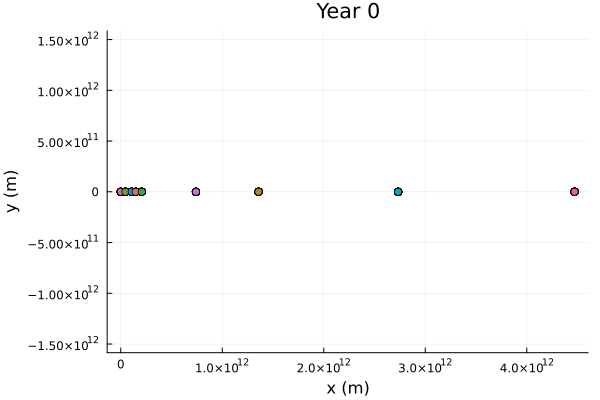

In [38]:
function animate_orbit(p::Vector{Any}, bodies::Vector{Planet}, duration::Float64)
    anim = @animate for i in 1:length(p)
        r = p[i]
        x = r[:, 1]
        y = r[:, 2]

        scatter!(x, y, markersize=2, label="")
        plot!(legend=:bottomright, title="Year $(i-1)", xlabel="x (m)", ylabel="y (m)", aspect_ratio=:equal)

        for b in bodies
            scatter!([b.r[1]], [b.r[2]], legend=:false)
        end
    end
    gif(anim, "orbits.gif", fps = length(p)/duration)
end



bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
orbit_data = RK_sim_gif(bodies, 5)
animate_orbit(orbit_data, bodies, 5.0)


In [47]:
function animate_orbit(p::Vector{Any}, bodies::Vector{Planet}, duration::Float64)
    anim = @animate for i in 1:length(p)
        r = p[i]
        x = r[:, 1]
        y = r[:, 2]

        plot(title="Year $(i-1)", xlabel="x (m)", ylabel="y (m)", aspect_ratio=:equal)

        for b in bodies
            scatter!([b.r[1]], [b.r[2]], markersize=3)
        end
        
        scatter!(x, y, markersize=4)
    end
    gif(anim, "orbits.gif", fps = length(p)/duration)
end


animate_orbit (generic function with 1 method)

[ Info: Saved animation to /home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbits.gif


Plots.AnimatedGif("/home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbits.gif")
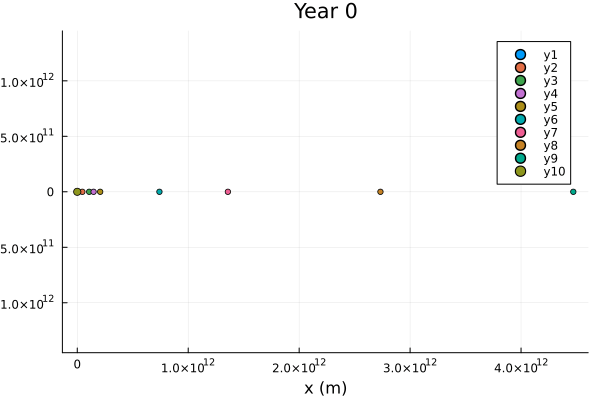

In [48]:

bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
orbit_data = RK_sim_gif(bodies, 5)
animate_orbit(orbit_data, bodies, 5.0)


In [59]:
function animate_orbit(p::Vector{Any}, bodies::Vector{Planet}, duration::Float64)
    anim = @animate for i in 1:length(bodies)
        r = p[i]
        x = [r[j][1] for j in 1:length(bodies)]
        y = [r[j][2] for j in 1:length(bodies)]

        plot(x, y, seriestype=:scatter,
             title="Year $(i-1)", xlabel="x (m)", ylabel="y (m)", aspect_ratio=:equal)

        for b in 1:length(bodies)
            plot!([b.r[1]], [b.r[2]], seriestype=:scatter)
        end
    end
    gif(anim, "orbits.gif", fps = length(p)/duration)
end


animate_orbit (generic function with 1 method)

In [60]:

bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
orbit_data = RK_sim_gif(bodies, 5)
animate_orbit(orbit_data, bodies, 5.0)


LoadError: BoundsError: attempt to access Float64 at index [2]

In [65]:
function RK_sim_animated(bodies, n, xl, yl)
    scatter_frames = @animate for i in 1:length(bodies)
        r = bodies[i].r
        v = bodies[i].v
        t = 0.0
        orbit = []
        for j in 1:length(bodies)
            if i != j
                while t < 365.25*24*3600*n
                    r, v = rk4_step(r, v, bodies[j].m, G, dt)
                    t += dt
                    push!(orbit, r)
                end
            end
        end
        orbit = hcat(orbit...)
        scatter(orbit[1,:]/1.496e11, orbit[2,:]/1.496e11, xlim=(-xl,xl), ylim=(-yl,yl),
                xlabel="x (m)", ylabel="y (m)", label=false,
                title="Orbit of planet $i around the Sun", legend=false)
    end
    gif(scatter_frames, "orbit_animation.gif", fps=1)
end


RK_sim_animated (generic function with 1 method)

[ Info: Saved animation to /home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbit_animation.gif


Plots.AnimatedGif("/home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbit_animation.gif")
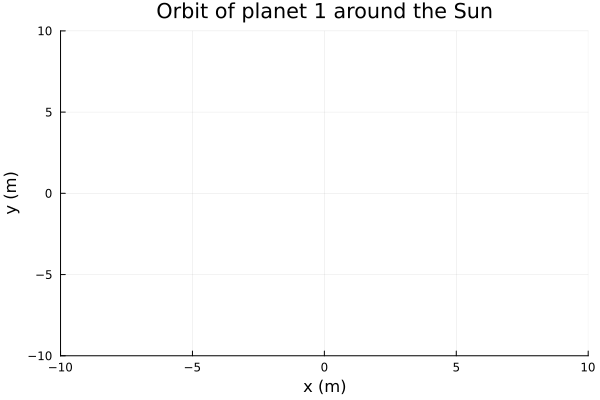

In [66]:

bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
RK_sim_animated(bodies, 1, 10, 10)

In [67]:
using Plots
gr()

function RK_sim_animated(bodies, n, xl, yl)
    scatter_frames = @animate for t in 0:dt:365.25*24*3600*n
        orbit = []
        for i in 1:length(bodies)
            r = bodies[i].r
            v = bodies[i].v
            for j in 1:length(bodies)
                if i != j
                    r, v = rk4_step(r, v, bodies[j].m, G, dt)
                end
            end
            push!(orbit, r)
        end
        orbit = hcat(orbit...)
        scatter(orbit[1,:]/1.496e11, orbit[2,:]/1.496e11, xlim=(-xl,xl), ylim=(-yl,yl),
                xlabel="x (m)", ylabel="y (m)", label=false,
                title="Orbits of planets around the Sun", legend=false, markersize=10)
    end
    gif(scatter_frames, "orbit_animation.gif", fps=10)
end


RK_sim_animated (generic function with 1 method)

[ Info: Saved animation to /home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbit_animation.gif


Plots.AnimatedGif("/home/chris/Documents/GitHub/phy261-Julia-main/phy261-Julia/LectureNotes/orbit_animation.gif")
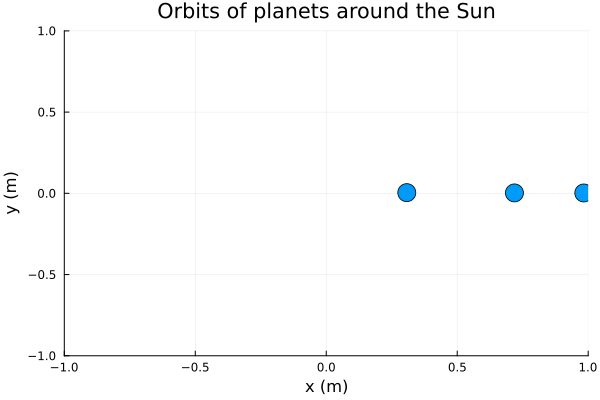

In [70]:

bodies = [sun, mercury, venus, earth]
RK_sim_animated(bodies, 1, 1, 1)